![Hand with calculator](calculator.jpg)

Did you know that the average return from investing in stocks is [10% per year](https://www.nerdwallet.com/article/investing/average-stock-market-return) (not accounting for inflation)? But who wants to be average?! 

You have been asked to support an investment firm by analyzing trends in high-growth companies. They are interested in understanding which industries are producing the highest valuations and the rate at which new high-value companies are emerging. Providing them with this information gives them a competitive insight as to industry trends and how they should structure their portfolio looking forward.

You have been given access to their `unicorns` database, which contains the following tables:

## dates
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `date_joined` | The date that the company became a unicorn.  |
| `year_founded` | The year that the company was founded.       |

## funding
| Column           | Description                                  |
|----------------- |--------------------------------------------- |
| `company_id`       | A unique ID for the company.                 |
| `valuation`        | Company value in US dollars.                 |
| `funding`          | The amount of funding raised in US dollars.  |
| `select_investors` | A list of key investors in the company.      |

## industries
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `industry`     | The industry that the company operates in.   |

## companies
| Column       | Description                                       |
|------------- |-------------------------------------------------- |
| `company_id`   | A unique ID for the company.                      |
| `company`      | The name of the company.                          |
| `city`         | The city where the company is headquartered.      |
| `country`      | The country where the company is headquartered.   |
| `continent`    | The continent where the company is headquartered. |


# The output

Your query should return a table in the following format:
| industry  | year | num\_unicorns       | average\_valuation\_billions |
| --------- | ---- | ------------------- | ---------------------------- |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |

Where `industry1`, `industry2`, and `industry3` are the three top-performing industries.

In [51]:
-- step-1
-- top industries(measured by num of industries)

SELECT i.industry, 
        COUNT(*)
FROM industries AS i
INNER JOIN dates AS d
ON i.company_id = d.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
GROUP BY industry
ORDER BY count DESC
LIMIT 3;


,industry,count
0,Fintech,173
1,Internet software & services,152
2,E-commerce & direct-to-consumer,75


In [52]:
-- step-2, yearly rankings data

SELECT 
	industry, 
	EXTRACT(year FROM d.date_joined) AS year,
	COUNT(*) AS num_unicorns, 
	AVG(valuation) AS avg_valuation
FROM industries AS i
INNER JOIN dates AS d
ON i.company_id = d.company_id
INNER JOIN funding AS f
ON d.company_id = f.company_id
GROUP BY industry, EXTRACT(year FROM d.date_joined)
;

,industry,year,num_unicorns,avg_valuation
0,Mobile & telecommunications,2017,5,2.800000e+09
1,Internet software & services,2015,4,1.250000e+09
2,Fintech,2018,10,8.600000e+09
3,Mobile & telecommunications,2019,4,2.000000e+09
4,Artificial intelligence,2012,1,2.000000e+09
...,...,...,...,...
119,E-commerce & direct-to-consumer,2022,7,1.571429e+09
120,Other,2015,2,1.000000e+09
121,Consumer & retail,2017,4,1.050000e+10
122,Fintech,2019,20,6.800000e+09


In [53]:
-- final step 
-- combining all query and setting the previous two as CTE 

WITH top_industries AS
(
SELECT i.industry, 
        COUNT(i.*) AS industry_count
FROM industries AS i
INNER JOIN dates AS d
ON i.company_id = d.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
GROUP BY industry
ORDER BY industry_count DESC
LIMIT 3
), 

yearly_rankings AS 
(
SELECT industry, 
	EXTRACT(year FROM d.date_joined) AS year,
	COUNT(i.*) AS num_unicorns, 
	AVG(f.valuation) AS avg_valuation	
FROM industries AS i
INNER JOIN dates AS d
ON i.company_id = d.company_id
INNER JOIN funding AS f
ON d.company_id = f.company_id
GROUP BY industry, EXTRACT(year FROM d.date_joined)
)
-- Final Query
SELECT 
		industry, 
		year, 
		num_unicorns, 
    	ROUND(AVG(avg_valuation / 1000000000), 2) AS average_valuation_billions	
FROM yearly_rankings
WHERE year IN (2019, 2020, 2021) AND 
		industry IN (
			SELECT industry
			FROM top_industries)
GROUP BY industry, year, num_unicorns
ORDER BY year DESC, num_unicorns DESC

,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,2.75
1,Internet software & services,2021,119,2.15
2,E-commerce & direct-to-consumer,2021,47,2.47
3,Internet software & services,2020,20,4.35
4,E-commerce & direct-to-consumer,2020,16,4.00
5,Fintech,2020,15,4.33
6,Fintech,2019,20,6.80
7,Internet software & services,2019,13,4.23
8,E-commerce & direct-to-consumer,2019,12,2.58


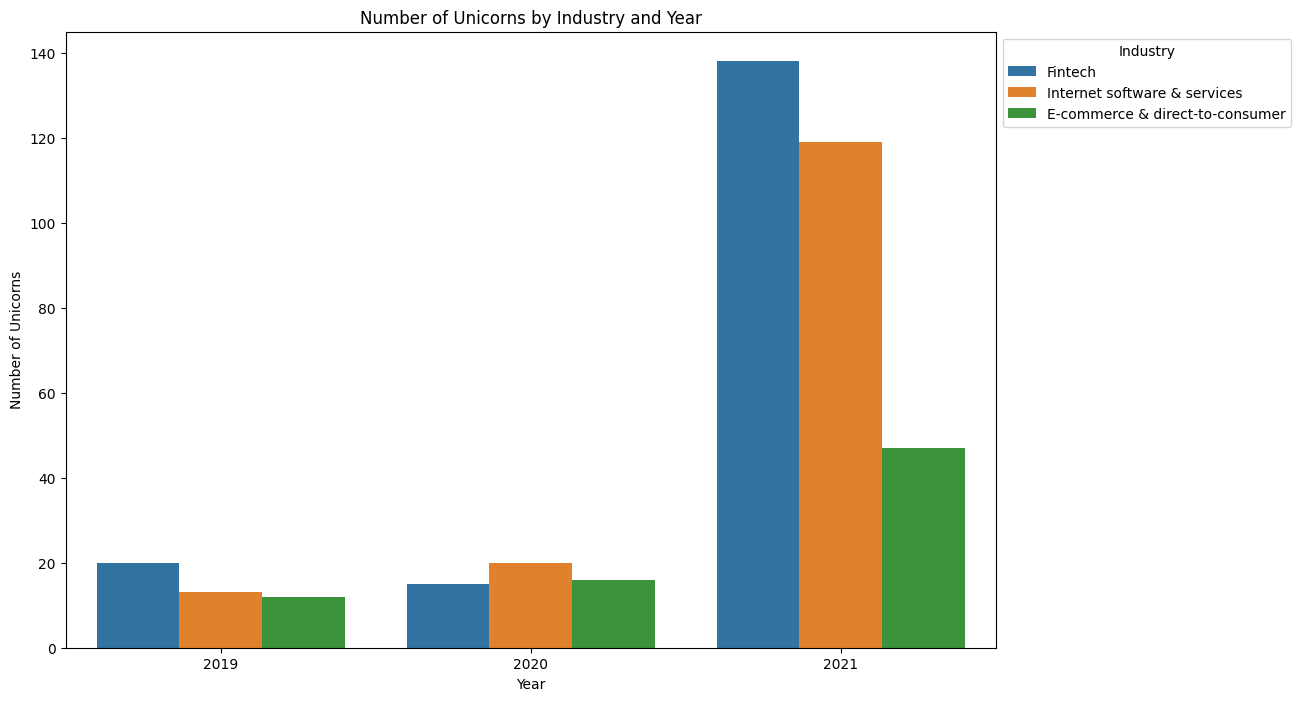

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Filter the DataFrame for the specified industries
selected_industries = ['Fintech', 'Internet software & services', 'E-commerce & direct-to-consumer']
filtered_df = df[df['industry'].isin(selected_industries)]

# Grouped bar plot for the number of unicorns by industry and year
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='num_unicorns', hue='industry', data=filtered_df)
plt.title('Number of Unicorns by Industry and Year')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.legend(title='Industry', bbox_to_anchor=(1, 1))
plt.show()
